<a href="https://colab.research.google.com/github/munnurumahesh03-coder/machine-learning-for-classification/blob/main/KNeighbors_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K Neighbors Classifier**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
weather_data = pd.read_csv('australia.csv')

In [ ]:
weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32912,10/27/2015,Sydney,15.5,19.6,7.6,7.8,2.0,S,54.0,S,...,65.0,47.0,1025.8,1025.8,8.0,7.0,16.5,19.3,Yes,No
32913,10/28/2015,Sydney,13.4,21.2,0.4,3.8,8.2,SSE,31.0,W,...,70.0,45.0,1025.3,1022.5,7.0,5.0,16.4,20.6,No,No
32914,10/29/2015,Sydney,15.7,23.0,0.0,5.4,11.4,E,31.0,WNW,...,55.0,40.0,1023.6,1022.1,5.0,1.0,18.2,21.9,No,No
32915,10/30/2015,Sydney,14.1,23.1,0.0,8.0,9.3,ENE,39.0,W,...,59.0,48.0,1023.8,1020.8,1.0,7.0,19.0,21.8,No,No


# **Exploratory Data Analysis**

---



In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32917 entries, 0 to 32916
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           32917 non-null  object 
 1   Location       32917 non-null  object 
 2   MinTemp        32418 non-null  float64
 3   MaxTemp        32548 non-null  float64
 4   Rainfall       32231 non-null  float64
 5   Evaporation    13846 non-null  float64
 6   Sunshine       9401 non-null   float64
 7   WindGustDir    28051 non-null  object 
 8   WindGustSpeed  28055 non-null  float64
 9   WindDir9am     28450 non-null  object 
 10  WindDir3pm     30818 non-null  object 
 11  WindSpeed9am   32089 non-null  float64
 12  WindSpeed3pm   31443 non-null  float64
 13  Humidity9am    32251 non-null  float64
 14  Humidity3pm    31587 non-null  float64
 15  Pressure9am    26233 non-null  float64
 16  Pressure3pm    26237 non-null  float64
 17  Cloud9am       17106 non-null  float64
 18  Cloud3

In [ ]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,32418.000000,32548.000000,32231.000000,13846.000000,9401.000000,28055.000000,32089.000000,31443.000000,32251.000000,31587.000000,26233.000000,26237.000000,17106.000000,16777.000000,32480.000000,31812.000000
mean,13.225421,24.002550,2.641376,5.615477,7.622349,37.356407,12.062202,16.571987,70.602059,52.357742,1018.259886,1015.674726,4.316263,4.425761,17.775052,22.539906
std,5.801119,6.002006,9.380427,4.535201,3.755806,13.338042,8.968107,8.928975,17.594609,20.625655,6.601990,6.533707,2.951394,2.720244,5.352449,5.847692
min,-4.800000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000
25%,8.900000,19.500000,0.000000,3.000000,5.100000,28.000000,6.000000,9.000000,59.000000,37.000000,1013.900000,1011.300000,1.000000,2.000000,14.000000,18.200000
50%,13.900000,23.400000,0.000000,4.600000,8.700000,35.000000,11.000000,15.000000,71.000000,53.000000,1018.300000,1015.700000,5.000000,5.000000,18.300000,21.900000
75%,17.900000,27.600000,0.600000,7.200000,10.500000,44.000000,19.000000,22.000000,84.000000,67.000000,1022.700000,1020.100000,7.000000,7.000000,21.700000,26.100000
max,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,9.000000,8.000000,37.700000,46.700000


In [ ]:
weather_data.isnull().sum()

,0
Date,0
Location,0
MinTemp,499
MaxTemp,369
Rainfall,686
Evaporation,19071
Sunshine,23516
WindGustDir,4866
WindGustSpeed,4862
WindDir9am,4467


In [ ]:
print(f"Original number of rows: {len(weather_data)}")
weather_data.dropna(subset=['RainTomorrow'], inplace=True)
print(f"Number of rows after dropping missing target values: {len(weather_data)}")

Original number of rows: 32917
Number of rows after dropping missing target values: 32230


In [ ]:
print("\nDistribution of 'RainTomorrow':")
print(weather_data['RainTomorrow'].value_counts(normalize=True))


Distribution of 'RainTomorrow':
RainTomorrow
No     0.77763
Yes    0.22237
Name: proportion, dtype: float64


In [ ]:
print("\nConverting target variable to numerical format (0 for 'No', 1 for 'Yes')...")
weather_data['RainTomorrow'] = weather_data['RainTomorrow'].map({'No': 0, 'Yes': 1})
print("Conversion complete.")
print("First 5 values of the transformed 'RainTomorrow' column:")
print(weather_data['RainTomorrow'].head())


Converting target variable to numerical format (0 for 'No', 1 for 'Yes')...
Conversion complete.
First 5 values of the transformed 'RainTomorrow' column:
0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64


In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32230 entries, 0 to 32915
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           32230 non-null  object 
 1   Location       32230 non-null  object 
 2   MinTemp        31882 non-null  float64
 3   MaxTemp        32046 non-null  float64
 4   Rainfall       31884 non-null  float64
 5   Evaporation    13724 non-null  float64
 6   Sunshine       9388 non-null   float64
 7   WindGustDir    27737 non-null  object 
 8   WindGustSpeed  27741 non-null  float64
 9   WindDir9am     28010 non-null  object 
 10  WindDir3pm     30336 non-null  object 
 11  WindSpeed9am   31600 non-null  float64
 12  WindSpeed3pm   30951 non-null  float64
 13  Humidity9am    31733 non-null  float64
 14  Humidity3pm    31065 non-null  float64
 15  Pressure9am    25817 non-null  float64
 16  Pressure3pm    25816 non-null  float64
 17  Cloud9am       16909 non-null  float64
 18  Cloud3pm   

In [ ]:
weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,31882.000000,32046.000000,31884.000000,13724.000000,9388.000000,27741.000000,31600.000000,30951.000000,31733.000000,31065.000000,25817.000000,25816.000000,16909.000000,16567.000000,31952.000000,31280.000000,32230.000000
mean,13.197136,23.970433,2.639145,5.603862,7.622827,37.330161,12.032816,16.579787,70.591183,52.358474,1018.266514,1015.685563,4.307233,4.418301,17.747878,22.510905,0.222370
std,5.795769,5.995648,9.391439,4.520957,3.754368,13.347676,8.959648,8.938032,17.619781,20.615525,6.606717,6.535812,2.950572,2.721146,5.348836,5.841566,0.415845
min,-4.800000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000,0.000000
25%,8.900000,19.500000,0.000000,3.000000,5.100000,28.000000,6.000000,9.000000,59.000000,37.000000,1013.900000,1011.300000,1.000000,2.000000,14.000000,18.200000,0.000000
50%,13.900000,23.350000,0.000000,4.600000,8.700000,35.000000,11.000000,15.000000,71.000000,53.000000,1018.300000,1015.800000,5.000000,5.000000,18.200000,21.800000,0.000000
75%,17.800000,27.600000,0.600000,7.200000,10.500000,44.000000,19.000000,22.000000,84.000000,67.000000,1022.700000,1020.100000,7.000000,7.000000,21.700000,26.000000,0.000000
max,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,9.000000,8.000000,37.700000,46.700000,1.000000


# **Visualization**

---



Text(0, 0.5, 'Count')

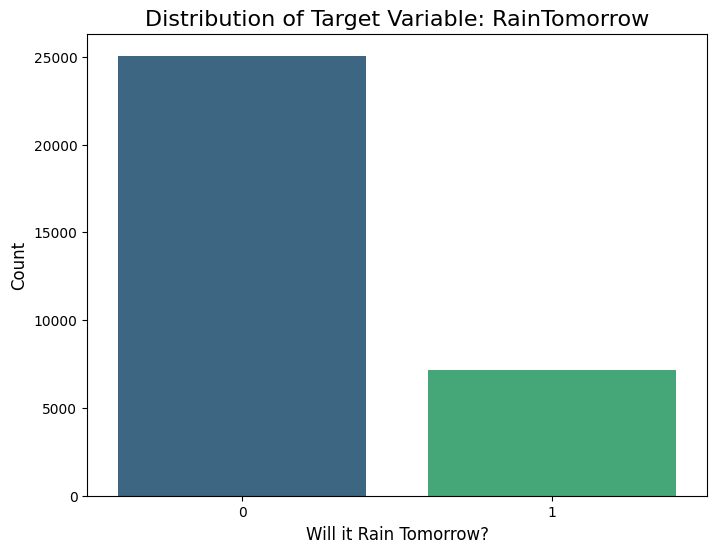

In [ ]:
plt.figure(figsize=(8, 6))
ax = plt.gca()

sns.countplot(
    data=weather_data,
    x='RainTomorrow',
    ax=ax,
    palette='viridis'
)
ax.set_title('Distribution of Target Variable: RainTomorrow', fontsize=16)
ax.set_xlabel('Will it Rain Tomorrow?', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

Text(0, 0.5, 'Frequency (Log Scale)')

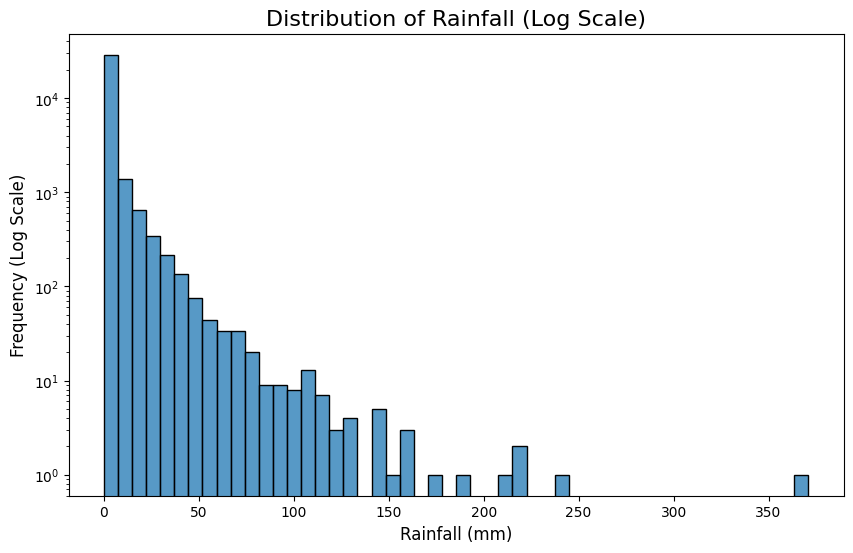

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.gca()


sns.histplot(
    data=weather_data,
    x='Rainfall',
    ax=ax,
    bins=50
)

ax.set_yscale('log')

ax.set_title('Distribution of Rainfall (Log Scale)', fontsize=16)
ax.set_xlabel('Rainfall (mm)', fontsize=12)
ax.set_ylabel('Frequency (Log Scale)', fontsize=12)

In [ ]:
px.histogram(weather_data,x='Location',color='RainToday',title='Location vs Raintoday')

Text(0, 0.5, 'Humidity at 3pm (%)')

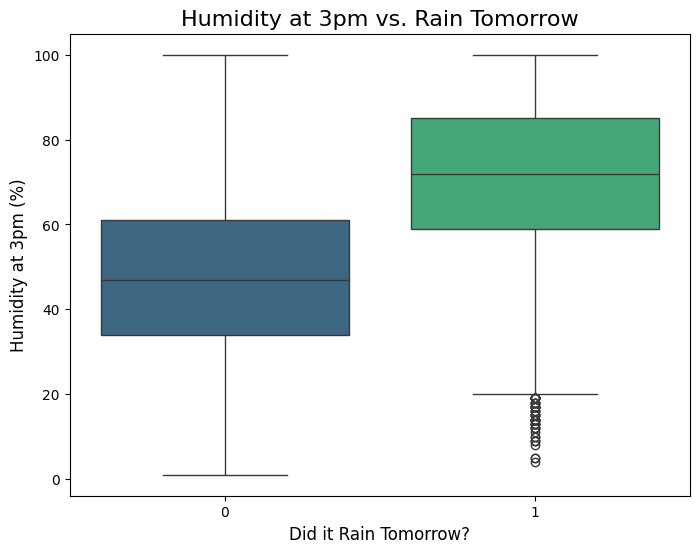

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=weather_data,
    x='RainTomorrow',
    y='Humidity3pm',
    palette='viridis'
)

plt.title('Humidity at 3pm vs. Rain Tomorrow', fontsize=16)
plt.xlabel('Did it Rain Tomorrow?', fontsize=12)
plt.ylabel('Humidity at 3pm (%)', fontsize=12)

Text(0, 0.5, 'Sunshine (Hours)')

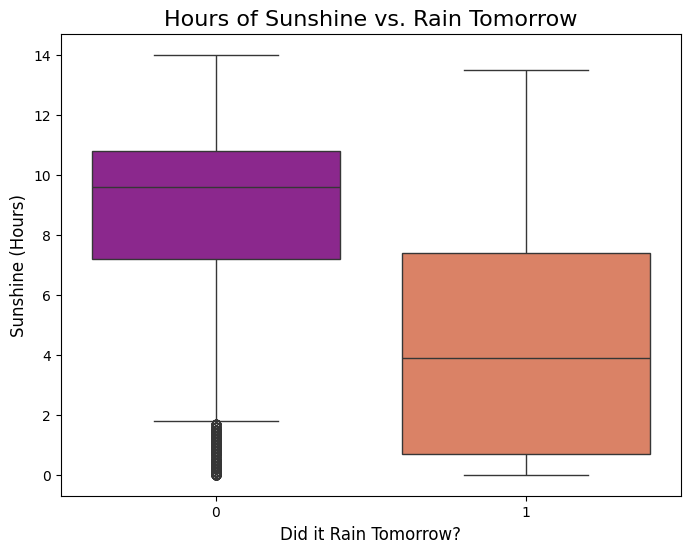

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=weather_data,
    x='RainTomorrow',
    y='Sunshine',
    palette='plasma'
)

plt.title('Hours of Sunshine vs. Rain Tomorrow', fontsize=16)
plt.xlabel('Did it Rain Tomorrow?', fontsize=12)
plt.ylabel('Sunshine (Hours)', fontsize=12)

Text(0.5, 1.0, 'Correlation Heatmap of All Numerical Features')

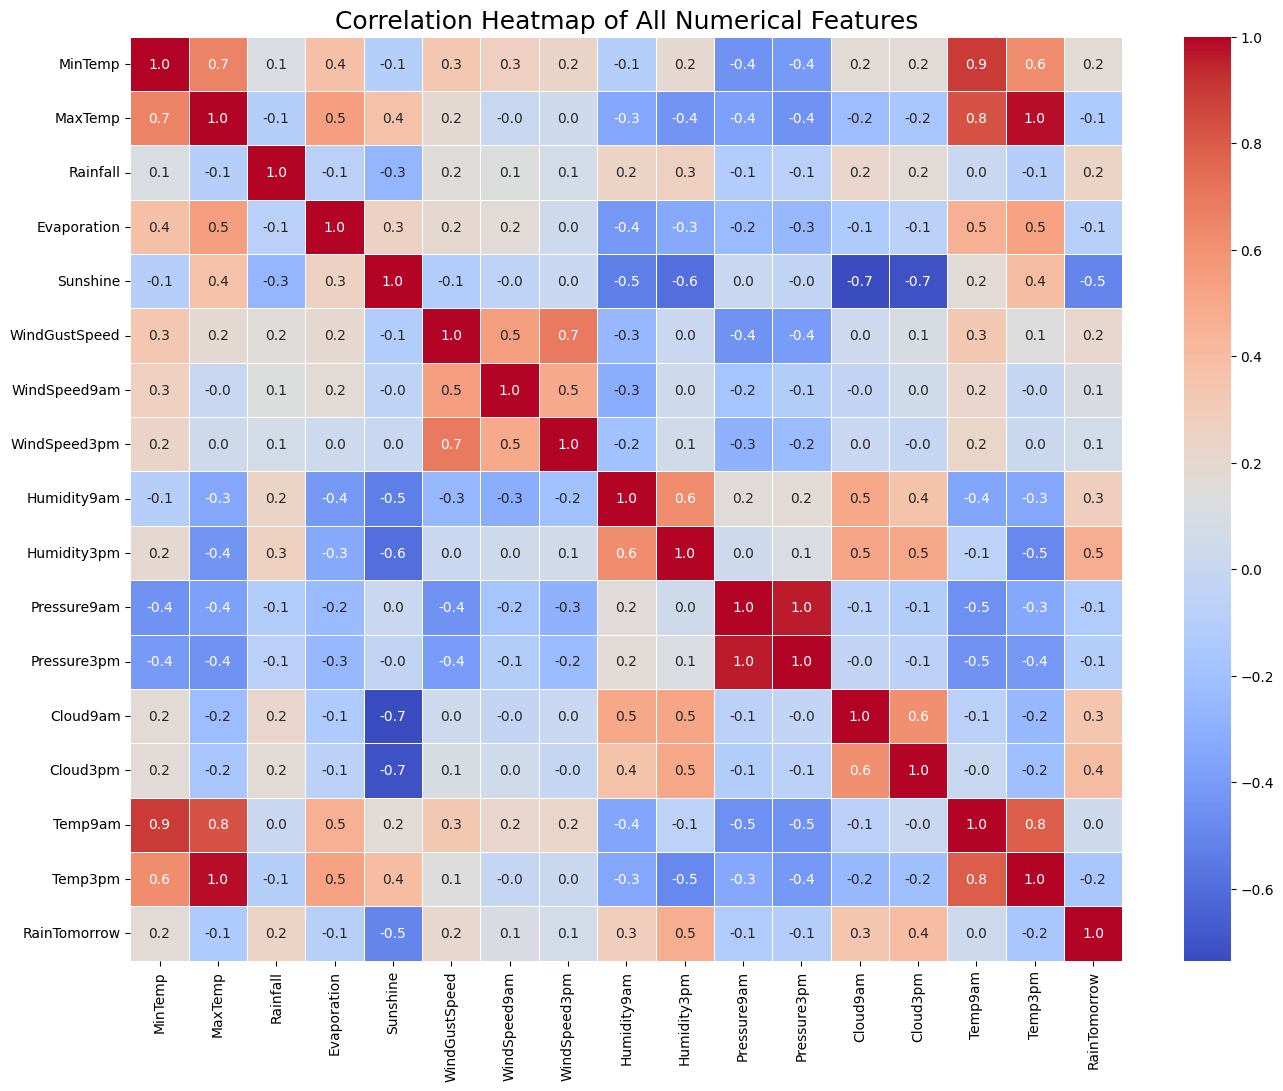

In [ ]:
plt.figure(figsize=(16, 12)) # Create a new, separate figure for the large heatmap
correlation_matrix = weather_data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Correlation Heatmap of All Numerical Features', fontsize=18)

# **Feature Engineering**

---



In [ ]:
# --- Make a copy to avoid changing the original raw data ---
df_eng = weather_data.copy()

# --- 1. Date-Based Features ---
# First, ensure the 'Date' column is in datetime format
df_eng['Date'] = pd.to_datetime(df_eng['Date'])

# Extract year, month, and day
df_eng['Year'] = df_eng['Date'].dt.year
df_eng['Month'] = df_eng['Date'].dt.month
df_eng['Day'] = df_eng['Date'].dt.day

# It's often useful to know the day of the year as well
df_eng['DayOfYear'] = df_eng['Date'].dt.dayofyear

print("Created date-based features: Year, Month, Day, DayOfYear")

Created date-based features: Year, Month, Day, DayOfYear


In [ ]:
# Daily temperature range
df_eng['TempRange'] = df_eng['MaxTemp'] - df_eng['MinTemp']

# Average temperature for the day
df_eng['AvgTemp'] = (df_eng['MinTemp'] + df_eng['MaxTemp']) / 2

print("Created temperature-based features: TempRange, AvgTemp")

Created temperature-based features: TempRange, AvgTemp


In [ ]:
df_eng['PressureChange'] = df_eng['Pressure3pm'] - df_eng['Pressure9am']

print("Created pressure-based feature: PressureChange")

Created pressure-based feature: PressureChange


In [ ]:
df_eng['AvgWindSpeed'] = (df_eng['WindSpeed9am'] + df_eng['WindSpeed3pm']) / 2

print("Created wind-based feature: AvgWindSpeed")

Created wind-based feature: AvgWindSpeed


In [ ]:
df_eng['HumidityTemp_Interaction'] = df_eng['AvgTemp'] * (df_eng['Humidity3pm'] * 0.01)

print("Created interaction feature: HumidityTemp_Interaction")

Created interaction feature: HumidityTemp_Interaction


In [ ]:
df_eng = df_eng.drop('Date', axis=1)
print("\nDropped the original 'Date' column.")


Dropped the original 'Date' column.


In [ ]:
# --- Display the results ---
print("\n--- DataFrame with New Features (first 5 rows) ---")
display(df_eng.head())

print(f"\nOriginal number of columns: {len(weather_data.columns)}")
print(f"New number of columns: {len(df_eng.columns)}")


--- DataFrame with New Features (first 5 rows) ---


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,0,2008,12,1,336,9.5,18.15,-0.6,22.0,3.9930
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,0,2008,12,2,337,17.7,16.25,-2.8,13.0,4.0625
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,0,2008,12,3,338,12.8,19.30,1.1,22.5,5.7900
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,0,2008,12,4,339,18.8,18.60,-4.8,10.0,2.9760
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,0,2008,12,5,340,14.8,24.90,-4.8,13.5,8.2170



Original number of columns: 23
New number of columns: 31


In [ ]:
df_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32230 entries, 0 to 32915
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location                  32230 non-null  object 
 1   MinTemp                   31882 non-null  float64
 2   MaxTemp                   32046 non-null  float64
 3   Rainfall                  31884 non-null  float64
 4   Evaporation               13724 non-null  float64
 5   Sunshine                  9388 non-null   float64
 6   WindGustDir               27737 non-null  object 
 7   WindGustSpeed             27741 non-null  float64
 8   WindDir9am                28010 non-null  object 
 9   WindDir3pm                30336 non-null  object 
 10  WindSpeed9am              31600 non-null  float64
 11  WindSpeed3pm              30951 non-null  float64
 12  Humidity9am               31733 non-null  float64
 13  Humidity3pm               31065 non-null  float64
 14  Pressure9am

In [ ]:
print("\n--- Preparing 'RainToday' Feature ---")
if 'RainToday' in df_eng.columns and df_eng['RainToday'].dtype == 'object':
    df_eng['RainToday'] = df_eng['RainToday'].map({'No': 0, 'Yes': 1})
    print("Converted 'RainToday' to 0s and 1s. It will be treated as CATEGORICAL in the pipeline.")

print("\n--- Final DataFrame Info ---")
df_eng.info()


--- Preparing 'RainToday' Feature ---
Converted 'RainToday' to 0s and 1s. It will be treated as CATEGORICAL in the pipeline.

--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 32230 entries, 0 to 32915
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location                  32230 non-null  object 
 1   MinTemp                   31882 non-null  float64
 2   MaxTemp                   32046 non-null  float64
 3   Rainfall                  31884 non-null  float64
 4   Evaporation               13724 non-null  float64
 5   Sunshine                  9388 non-null   float64
 6   WindGustDir               27737 non-null  object 
 7   WindGustSpeed             27741 non-null  float64
 8   WindDir9am                28010 non-null  object 
 9   WindDir3pm                30336 non-null  object 
 10  WindSpeed9am              31600 non-null  float64
 11  WindSpeed3pm        

In [ ]:
df_eng.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
count,31882.000000,32046.000000,31884.000000,13724.000000,9388.000000,27741.000000,31600.000000,30951.000000,31733.000000,31065.000000,...,32230.000000,32230.000000,32230.000000,32230.000000,32230.000000,31763.000000,31763.000000,25744.000000,30758.000000,30829.000000
mean,13.197136,23.970433,2.639145,5.603862,7.622827,37.330161,12.032816,16.579787,70.591183,52.358474,...,0.222370,2012.642011,6.382253,15.702730,178.790071,10.779807,18.584495,-2.584599,14.356753,9.549730
std,5.795769,5.995648,9.391439,4.520957,3.754368,13.347676,8.959648,8.938032,17.619781,20.615525,...,0.415845,2.503970,3.409985,8.798165,104.238043,4.894159,5.369555,1.753245,7.693653,4.596082
min,-4.800000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,3.100000,-11.100000,0.000000,0.241000
25%,8.900000,19.500000,0.000000,3.000000,5.100000,28.000000,6.000000,9.000000,59.000000,37.000000,...,0.000000,2010.000000,3.000000,8.000000,89.000000,6.800000,14.550000,-3.700000,8.500000,5.734000
50%,13.900000,23.350000,0.000000,4.600000,8.700000,35.000000,11.000000,15.000000,71.000000,53.000000,...,0.000000,2013.000000,6.000000,16.000000,175.000000,10.400000,18.650000,-2.600000,14.000000,8.925000
75%,17.800000,27.600000,0.600000,7.200000,10.500000,44.000000,19.000000,22.000000,84.000000,67.000000,...,0.000000,2015.000000,9.000000,23.000000,268.000000,14.500000,22.500000,-1.500000,19.000000,12.803000
max,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,...,1.000000,2017.000000,12.000000,31.000000,366.000000,28.800000,38.000000,7.200000,83.000000,28.551000


# **Train Test Split**

---



In [ ]:
# --- Splitting the data based on the 'Year' column ---
train_df = df_eng[df_eng.Year < 2015].copy()
val_df = df_eng[df_eng.Year == 2015].copy()
test_df = df_eng[df_eng.Year > 2015].copy()

# --- Verify the Shapes ---
print("--- DataFrame Shapes after Time-Based Splitting ---")
print("Training DataFrame shape:", train_df.shape)
print("Validation DataFrame shape:", val_df.shape)
print("Test DataFrame shape:", test_df.shape)

--- DataFrame Shapes after Time-Based Splitting ---
Training DataFrame shape: (23130, 31)
Validation DataFrame shape: (3818, 31)
Test DataFrame shape: (5282, 31)


In [ ]:
train_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,0,2008,12,1,336,9.5,18.15,-0.6,22.0,3.9930
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,0,2008,12,2,337,17.7,16.25,-2.8,13.0,4.0625
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,0,2008,12,3,338,12.8,19.30,1.1,22.5,5.7900
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,0,2008,12,4,339,18.8,18.60,-4.8,10.0,2.9760
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,0,2008,12,5,340,14.8,24.90,-4.8,13.5,8.2170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32608,Sydney,18.8,21.7,0.0,10.6,0.0,ENE,31.0,ESE,ESE,...,0,2014,12,27,361,2.9,20.25,-0.4,13.0,10.7325
32609,Sydney,18.9,24.2,0.0,4.0,2.0,ENE,30.0,S,E,...,0,2014,12,28,362,5.3,21.55,-3.3,7.5,13.1455
32610,Sydney,17.7,27.3,0.0,5.4,12.6,NNE,46.0,NNW,NE,...,0,2014,12,29,363,9.6,22.50,-5.6,18.5,14.8500
32611,Sydney,19.4,28.1,0.0,8.0,12.7,SSW,54.0,S,E,...,0,2014,12,30,364,8.7,23.75,-3.4,15.0,11.8750


In [ ]:
val_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
2133,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,W,...,0,2015,1,1,1,22.1,22.45,-2.5,9.0,3.1430
2134,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,ESE,...,0,2015,1,2,2,24.1,27.55,-3.6,9.0,3.3060
2135,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,N,...,0,2015,1,3,3,21.2,27.70,-5.6,20.0,5.2630
2136,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,W,...,0,2015,1,4,4,7.1,29.55,-1.5,7.0,10.9335
2137,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,SE,...,0,2015,1,5,5,16.2,27.10,-2.7,8.0,9.2140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32911,Sydney,17.5,29.4,0.0,7.0,5.2,WSW,69.0,ESE,WSW,...,1,2015,10,26,299,11.9,23.45,0.7,11.0,12.4285
32912,Sydney,15.5,19.6,7.6,7.8,2.0,S,54.0,S,SSE,...,0,2015,10,27,300,4.1,17.55,0.0,24.5,8.2485
32913,Sydney,13.4,21.2,0.4,3.8,8.2,SSE,31.0,W,E,...,0,2015,10,28,301,7.8,17.30,-2.8,14.5,7.7850
32914,Sydney,15.7,23.0,0.0,5.4,11.4,E,31.0,WNW,E,...,0,2015,10,29,302,7.3,19.35,-1.5,14.5,7.7400


In [ ]:
test_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,RainTomorrow,Year,Month,Day,DayOfYear,TempRange,AvgTemp,PressureChange,AvgWindSpeed,HumidityTemp_Interaction
2498,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,ESE,...,0,2016,1,1,1,17.2,29.00,-4.2,3.5,4.9300
2499,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,SE,...,1,2016,1,2,2,12.7,27.25,-2.7,13.0,8.1750
2500,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,ENE,...,1,2016,1,3,3,4.7,20.75,0.8,25.0,13.9025
2501,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,SSE,...,1,2016,1,4,4,6.4,20.50,-1.4,13.0,13.3250
2502,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,SSE,...,0,2016,1,5,5,7.4,19.20,-2.4,7.5,12.0960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30171,Richmond,5.3,19.1,0.2,NaN,NaN,SW,24.0,NaN,SSE,...,0,2017,6,21,172,13.8,12.20,-1.2,7.5,8.1740
30172,Richmond,4.5,18.1,0.0,NaN,NaN,NE,19.0,NaN,NE,...,0,2017,6,22,173,13.6,11.30,-4.9,5.5,6.7800
30173,Richmond,4.3,17.7,0.0,NaN,NaN,WNW,20.0,S,NNE,...,0,2017,6,23,174,13.4,11.00,-6.1,5.0,7.8100
30174,Richmond,2.5,19.8,0.0,NaN,NaN,W,26.0,W,SSW,...,0,2017,6,24,175,17.3,11.15,-2.6,5.5,4.3485


# **Input and Target Columns**

---



In [ ]:
target_column = 'RainTomorrow'

# Create Training sets
X_train = train_df.drop(target_column, axis=1)
y_train = train_df[target_column]

In [ ]:
# Create Validation sets
X_val = val_df.drop(target_column, axis=1)
y_val = val_df[target_column]

In [ ]:
# Create Test sets
X_test = test_df.drop(target_column, axis=1)
y_test = test_df[target_column]

In [ ]:
# --- Verify the Shapes ---
print("--- Final Dataset Shapes ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print("-" * 30)
print(f"Shape of X_val:   {X_val.shape}")
print(f"Shape of y_val:   {y_val.shape}")
print("-" * 30)
print(f"Shape of X_test:  {X_test.shape}")
print(f"Shape of y_test:  {y_test.shape}")

--- Final Dataset Shapes ---
Shape of X_train: (23130, 30)
Shape of y_train: (23130,)
------------------------------
Shape of X_val:   (3818, 30)
Shape of y_val:   (3818,)
------------------------------
Shape of X_test:  (5282, 30)
Shape of y_test:  (5282,)


# **Pipeline**

---



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# We assume X_train is your training features DataFrame.

# --- 1. Identify Numerical and Categorical Columns ---
# We explicitly drop 'Year' as it was only for splitting.
numerical_features = X_train.select_dtypes(include=np.number).columns.drop('Year').tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

# The 'RainToday' column is conceptually categorical. Move it to the correct list.
if 'RainToday' in numerical_features:
    numerical_features.remove('RainToday')
    categorical_features.append('RainToday')

print(f"Identified {len(numerical_features)} numerical features for the pipeline.")
print(f"Identified {len(categorical_features)} categorical features for the pipeline.")


# --- 2. Construct the Preprocessing Pipelines ---
# Numerical pipeline: This is CRITICAL for KNN.
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) # Essential for distance-based models like KNN
])

# Categorical pipeline: Same as before.
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'))
])


# --- 3. Combine Preprocessing Steps with ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='drop' # Drop any columns not specified (like 'Year')
)


# --- 4. Create the Full KNN Model Pipeline ---
# This chains the preprocessor and the KNN classifier together.
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

print("\n✅ KNN preprocessing and full model pipeline created successfully!")
display(knn_pipeline)


Identified 24 numerical features for the pipeline.
Identified 5 categorical features for the pipeline.

✅ KNN preprocessing and full model pipeline created successfully!


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9a...
                                                   'TempRange', 'AvgTemp',
                                                   'PressureChange',
                                                   'AvgWindSpeed',
                                                   'HumidityTemp_Interaction']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainToday'])])),
                ('classifier', KNeighborsClassifier())])

# **Evaluation and Selection**

---



In [ ]:
print("Training the knn pipeline...")
knn_pipeline.fit(X_train, y_train)
print("✅ Training complete.")

Training the knn pipeline...
✅ Training complete.


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report

print("\nMaking predictions on the validation data...")
val_preds = knn_pipeline.predict(X_val)
val_preds_proba = knn_pipeline.predict_proba(X_val)[:, 1] # Get probabilities for AUC-ROC

print("\n--- Baseline knn Evaluation ---")
f1 = f1_score(y_val, val_preds)
roc_auc = roc_auc_score(y_val, val_preds_proba)
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC:  {roc_auc:.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_val, val_preds))


Making predictions on the validation data...

--- Baseline knn Evaluation ---
F1-Score: 0.5085
AUC-ROC:  0.7763

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      2878
           1       0.70      0.40      0.51       940

    accuracy                           0.81      3818
   macro avg       0.77      0.67      0.70      3818
weighted avg       0.80      0.81      0.79      3818



# **RandomizedSearch CV**

---



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import time

# We assume 'knn_pipeline', 'X_train', and 'y_train' are defined.

# --- 1. Define the Hyperparameter Distribution ---
param_dist = {
    'classifier__n_neighbors': randint(3, 60),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}


# --- 2. Set up and Run a FASTER RandomizedSearchCV ---
print("--- Running a FASTER RandomizedSearchCV for K-Nearest Neighbors ---")

random_search_fast = RandomizedSearchCV(
    estimator=knn_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=2,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# --- 3. Run the Search and Time It ---
start_time = time.time()
random_search_fast.fit(X_train, y_train)
end_time = time.time()

print(f"\n✅ RandomizedSearchCV Complete in {((end_time - start_time) / 60):.2f} minutes.")


# --- 4. Display the Best Results from the Search ---
print(f"\nBest average F1-Score during cross-validation: {random_search_fast.best_score_:.4f}")
print("\nBest Hyperparameters found:")
print(random_search_fast.best_params_)


--- Running a FASTER RandomizedSearchCV for K-Nearest Neighbors ---
Fitting 2 folds for each of 20 candidates, totalling 40 fits

✅ RandomizedSearchCV Complete in 3.77 minutes.

Best average F1-Score during cross-validation: 0.4818

Best Hyperparameters found:
{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 4, 'classifier__weights': 'distance'}


# **Evaluation**

---



In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix
import plotly.express as px

# We assume 'random_search_fast' is your FITTED RandomizedSearchCV object.
# We assume 'X_val' and 'y_val' are your validation sets.

# --- Step 1: Get the Best Model from the Search ---
best_knn_model = random_search_fast.best_estimator_
print("✅ Best KNN model extracted from RandomizedSearchCV.")


# --- Step 2: Make Predictions on the Unseen Validation Data ---
print("Making predictions on the validation data...")
val_preds = best_knn_model.predict(X_val)
val_preds_proba = best_knn_model.predict_proba(X_val)[:, 1] # Probabilities for the 'Yes' class


# --- Step 3: Calculate and Print the Final Scores ---
final_f1_score = f1_score(y_val, val_preds)
final_auc_score = roc_auc_score(y_val, val_preds_proba)

print("\n--- Official Gauntlet Score for Tuned KNN ---")
print(f"Validation F1-Score: {final_f1_score:.4f}")
print(f"Validation AUC-ROC:  {final_auc_score:.4f}")
print("---------------------------------------------")


# --- Step 4: Display the Full Classification Report and Confusion Matrix ---
print("\n--- Full Classification Report ---")
print(classification_report(y_val, val_preds, target_names=['No Rain', 'Rain']))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_val, val_preds)
# Using Plotly to make the confusion matrix clear and professional
fig = px.imshow(cm,
                text_auto=True,
                labels=dict(x="Predicted Label", y="True Label"),
                x=['No Rain', 'Rain'],
                y=['No Rain', 'Rain'],
                title="KNN Confusion Matrix"
               )
fig.show()

# Optional: Save the confusion matrix plot for the README
# fig.write_image("images/02_knn_confusion_matrix.png", scale=2)


✅ Best KNN model extracted from RandomizedSearchCV.
Making predictions on the validation data...

--- Official Gauntlet Score for Tuned KNN ---
Validation F1-Score: 0.5050
Validation AUC-ROC:  0.7665
---------------------------------------------

--- Full Classification Report ---
              precision    recall  f1-score   support

     No Rain       0.83      0.94      0.88      2878
        Rain       0.67      0.40      0.50       940

    accuracy                           0.80      3818
   macro avg       0.75      0.67      0.69      3818
weighted avg       0.79      0.80      0.79      3818


--- Confusion Matrix ---


# **Feature Importance**

---



In [ ]:
from sklearn.inspection import permutation_importance

perm_importance_df = pd.DataFrame({
    'Feature': X_val.columns,
    'Importance': permutation_importance(best_knn_model, X_val, y_val, scoring='f1', n_repeats=5, random_state=42).importances_mean
}).sort_values(by='Importance', ascending=False)

display(perm_importance_df.head(10))

,Feature,Importance
13,Humidity3pm,0.080540
29,HumidityTemp_Interaction,0.049564
17,Cloud3pm,0.026672
25,TempRange,0.022258
12,Humidity9am,0.021803
7,WindGustSpeed,0.020227
5,Sunshine,0.017469
16,Cloud9am,0.015257
6,WindGustDir,0.011404
19,Temp3pm,0.010115


<Axes: title={'center': 'Feature_Importance'}, xlabel='Importance', ylabel='Feature'>

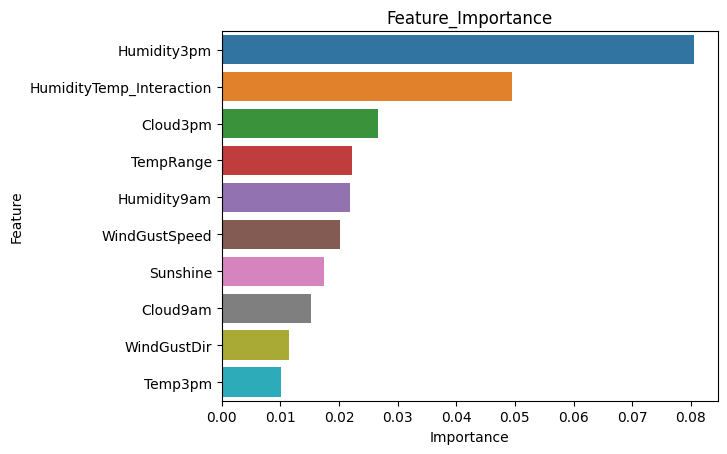

In [ ]:
plt.title('Feature_Importance')
sns.barplot(data=perm_importance_df.head(10),x='Importance',y='Feature',hue='Feature')

# **Saving through Joblib**

---



In [ ]:
import joblib

# --- Step 1: Define the Baseline KNN Pipeline ---
# This pipeline uses the default KNeighborsClassifier() with no extra parameters.
baseline_knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


# --- Step 2: Train the Baseline Pipeline on the Full Training Data ---
print("Training the baseline KNN model on the full training data...")
baseline_knn_pipeline.fit(X_train, y_train)
print("✅ Training complete.")


# --- Step 3: Save the Trained Model using joblib ---
model_filename = '02_knn_baseline.joblib'
joblib.dump(baseline_knn_pipeline, model_filename)

print(f"\n✅ Best performing KNN model (the baseline) successfully saved to '{model_filename}'")

# we are using baseline knn because knn after tuning is worst

Training the baseline KNN model on the full training data...
✅ Training complete.

✅ Best performing KNN model (the baseline) successfully saved to '02_knn_baseline.joblib'


# **Deployment**

---



In [50]:
import gradio as gr
import pandas as pd
import joblib
import numpy as np
import warnings

# --- Ignore Warnings ---
warnings.filterwarnings("ignore")

# --- 1. Load Model and Define Constants ---
MODEL_FILENAME = '02_knn_baseline.joblib'

try:
    model_pipeline = joblib.load(MODEL_FILENAME)
    print(f"✅ Model '{MODEL_FILENAME}' loaded successfully.")
except FileNotFoundError:
    print(f"❌ FATAL ERROR: Model file '{MODEL_FILENAME}' not found.")
    model_pipeline = None

# The full list of columns the model expects
MODEL_INPUT_COLUMNS = [
    'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
    'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year',
    'Month', 'Day', 'DayOfYear', 'TempRange', 'AvgTemp', 'PressureChange',
    'AvgWindSpeed', 'HumidityTemp_Interaction'
]

AUSTRALIA_LOCATIONS = [
    'Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle',
    'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport',
    'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong',
    'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne',
    'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
    'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera',
    'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums',
    'Walpole', 'Hobart', 'Launceston', 'AliceSprings', ' Darwin', 'Katherine', 'Uluru'
]


# --- 2. Define the Prediction Function ---
def predict_rainfall(location, min_temp, max_temp, rainfall, wind_gust_speed,
                     humidity_3pm, pressure_9am, cloud_3pm, rain_today):
    if model_pipeline is None:
        return "Model not loaded. Please check server logs.", ""

    user_inputs = {
        'Location': location, 'MinTemp': min_temp, 'MaxTemp': max_temp,
        'Rainfall': rainfall, 'WindGustSpeed': wind_gust_speed,
        'Humidity3pm': humidity_3pm, 'Pressure9am': pressure_9am,
        'Cloud3pm': cloud_3pm, 'RainToday': 1 if rain_today == 'Yes' else 0
    }

    full_data = {col: np.nan for col in MODEL_INPUT_COLUMNS}
    full_data.update(user_inputs)
    input_df = pd.DataFrame([full_data])[MODEL_INPUT_COLUMNS]

    prediction = model_pipeline.predict(input_df)[0]
    prediction_proba = model_pipeline.predict_proba(input_df)[0]

    result = "Yes, it is likely to rain tomorrow." if prediction == 1 else "No, it is not likely to rain tomorrow."
    confidence = f"Confidence: [No: {prediction_proba[0]:.2%}, Yes: {prediction_proba[1]:.2%}]"
    return result, confidence


# --- 3. Define the Gradio Interface with Initial Values ---
inputs = [
    gr.Dropdown(choices=AUSTRALIA_LOCATIONS, label="Location", value='Sydney'),

    gr.Number(label="Min Temperature (°C)",
              minimum=-4.8,
              maximum=29.7,
              value=13.9),

    gr.Number(label="Max Temperature (°C)",
              minimum=6.8,
              maximum=47.3,
              value=23.35),

    gr.Number(label="Rainfall Today (mm)",
              minimum=0.0,
              maximum=371.0,
              value=0.0),

    gr.Number(label="Wind Gust Speed (km/h)",
              minimum=7.0,
              maximum=135.0,
              value=35.0),

    gr.Number(label="Humidity at 3pm (%)",
              minimum=1.0,
              maximum=100.0,
              value=53.0),

    gr.Number(label="Pressure at 9am (hPa)",
              minimum=980.5,
              maximum=1041.0,
              value=1017.6),

    gr.Number(label="Cloud Coverage at 3pm (oktas, 0-8)",
              minimum=0.0,
              maximum=9.0,
              value=5.0),

    gr.Radio(choices=['No', 'Yes'], label="Did it Rain Today?", value='No')
]

outputs = [
    gr.Textbox(label="Prediction"),
    gr.Textbox(label="Model Confidence")
]


# --- 4. Launch the App ---
app = gr.Interface(
    fn=predict_rainfall,
    inputs=inputs,
    outputs=outputs,
    title="🌧️ Australia Rain Predictor (KNN Model) 🇦🇺",
    description=(
        "This app predicts whether it will rain tomorrow in various locations across Australia. "
        "This version is powered by a **K-Nearest Neighbors (KNN)** model. "
        "Enter the weather conditions for today to get a prediction for tomorrow."
    ),
    allow_flagging='never'
)

if __name__ == "__main__":
    app.launch()


✅ Model '02_knn_baseline.joblib' loaded successfully.
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://49b3be54c234b2a3aa.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
